In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style='whitegrid')
import missingno as msno
import matplotlib.pyplot as plt

In [25]:
data1= pd.read_csv('MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
data2= pd.read_csv('MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')
data3= pd.read_csv('MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv')
data4= pd.read_csv('MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv')
data5= pd.read_csv('MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv')
data6= pd.read_csv('MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv')
data7= pd.read_csv('MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv')
data8= pd.read_csv('MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv')

In [26]:
data_list =[data1, data2, data3, data4, data5, data6, data7, data8]

print('Data dimensions: ')
for i, data in enumerate(data_list, start = 1):
  rows, cols = data.shape
  print(f'Data{i} -> {rows} rows, {cols} columns')

Data dimensions: 
Data1 -> 225745 rows, 79 columns
Data2 -> 286467 rows, 79 columns
Data3 -> 191033 rows, 79 columns
Data4 -> 529918 rows, 79 columns
Data5 -> 288602 rows, 79 columns
Data6 -> 170366 rows, 79 columns
Data7 -> 445909 rows, 79 columns
Data8 -> 692703 rows, 79 columns


In [27]:
data= pd.concat(data_list)
rows, columns = data.shape

print('new dimensions')
print(f'no. of rows: {rows}')
print(f'no. of columns: {columns}')
print(f'total cells: {rows * columns}')

new dimensions
no. of rows: 2830743
no. of columns: 79
total cells: 223628697


In [28]:
for d in data_list: del d #to save memory, remember to delete the dataframes after concatinating them.

In [29]:
#stripping the white space in the cols
col_names = {col: col.strip() for col in data.columns}
data.rename(columns = col_names, inplace = True)



In [30]:
data.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [31]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2830743 entries, 0 to 692702
Data columns (total 79 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int64  
 1   Flow Duration                int64  
 2   Total Fwd Packets            int64  
 3   Total Backward Packets       int64  
 4   Total Length of Fwd Packets  int64  
 5   Total Length of Bwd Packets  int64  
 6   Fwd Packet Length Max        int64  
 7   Fwd Packet Length Min        int64  
 8   Fwd Packet Length Mean       float64
 9   Fwd Packet Length Std        float64
 10  Bwd Packet Length Max        int64  
 11  Bwd Packet Length Min        int64  
 12  Bwd Packet Length Mean       float64
 13  Bwd Packet Length Std        float64
 14  Flow Bytes/s                 float64
 15  Flow Packets/s               float64
 16  Flow IAT Mean                float64
 17  Flow IAT Std                 float64
 18  Flow IAT Max                 int64  
 19  Flow I

In [32]:
pd.options.display.max_rows = 80

print('Overview of Columns:')
data.describe().transpose()

Overview of Columns:


C:\Users\reach\AppData\Roaming\Python\Python312\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
C:\Users\reach\AppData\Roaming\Python\Python312\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,count,mean,std,min,25%,50%,75%,max
Destination Port,2830743.0,8.071483e+03,1.828363e+04,0.000000e+00,53.000000,80.000000,4.430000e+02,6.553500e+04
Flow Duration,2830743.0,1.478566e+07,3.365374e+07,-1.300000e+01,155.000000,31316.000000,3.204828e+06,1.200000e+08
Total Fwd Packets,2830743.0,9.361160e+00,7.496728e+02,1.000000e+00,2.000000,2.000000,5.000000e+00,2.197590e+05
Total Backward Packets,2830743.0,1.039377e+01,9.973883e+02,0.000000e+00,1.000000,2.000000,4.000000e+00,2.919220e+05
Total Length of Fwd Packets,2830743.0,5.493024e+02,9.993589e+03,0.000000e+00,12.000000,62.000000,1.870000e+02,1.290000e+07
Total Length of Bwd Packets,2830743.0,1.616264e+04,2.263088e+06,0.000000e+00,0.000000,123.000000,4.820000e+02,6.554530e+08
Fwd Packet Length Max,2830743.0,2.075999e+02,7.171848e+02,0.000000e+00,6.000000,37.000000,8.100000e+01,2.482000e+04
Fwd Packet Length Min,2830743.0,1.871366e+01,6.033935e+01,0.000000e+00,0.000000,2.000000,3.600000e+01,2.325000e+03
Fwd Packet Length Mean,2830743.0,5.820194e+01,1.860912e+02,0.000000e+00,6.000000,34.000000,5.000000e+01,5.940857e+03
Fwd Packet Length Std,2830743.0,6.891013e+01,2.811871e+02,0.000000e+00,0.000000,0.000000,2.616295e+01,7.125597e+03


In [33]:
pd.options.display.max_columns = 80
data

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.00000,0,0,0.0,0.0,4.000000e+06,666666.666700,3.0,0.000000,3,3,3,3.00000,0.00000,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0,9.000000,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,33,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.00000,6,6,6.0,0.0,1.100917e+05,18348.623850,109.0,0.000000,109,109,0,0.00000,0.00000,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,9174.311927,9174.311927,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,1,9.000000,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.00000,6,6,6.0,0.0,2.307692e+05,38461.538460,52.0,0.000000,52,52,0,0.00000,0.00000,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,19230.769230,19230.769230,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,1,9.000000,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.00000,6,6,6.0,0.0,3.529412e+05,58823.529410,34.0,0.000000,34,34,0,0.00000,0.00000,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,29411.764710,29411.764710,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,1,9.000000,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,31,329,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.00000,0,0,0.0,0.0,4.000000e+06,666666.666700,3.0,0.000000,3,3,3,3.00000,0.00000,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0,9.000000,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,32,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692698,53,32215,4,2,112,152,28,28,28.0,0.00000,76,76,76.0,0.0,8.194940e+03,186.248642,6443.0,13617.579480,30780,3,30832,10277.33333,17755.84381,30780,4,3,3.0,0.0,3,3,0,0,0,0,80,64,124.165761,62.082881,28,76,41.714286,23.421602,548.571429,0,0,0,0,0,0,0,0,0,48.666667,28.0,76.0,80,0,0,0,0,0,0,4,112,2,152,-1,-1,3,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692699,53,324,2,2,84,362,42,42,42.0,0.00000,181,181,181.0,0.0,1.376543e+06,12345.679010,108.0,183.597386,320,2,2,2.00000,0.00000,2,2,2,2.0,0.0,2,2,0,0,0,0,40,40,6172.839506,6172.839506,42,181,97.600000,76.133435,5796.300000,0,0,0,0,0,0,0,0,1,122.000000,42.0,181.0,40,0,0,0,0,0,0,2,84,2,362,-1,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692700,58030,82,2,1,31,6,31,0,15.5,21.92031,6,6,6.0,0.0,4.512195e+05,36585.365850,41.0,52.325902,78,4,4,4.00000,0.00000,4,4,0,0.0,0.0,0,0,1,0,0,0,64,20,24390.243900,12195.121950,0,31,17.000000,16.3

In [34]:
#identifying duplicate data
duplicate_data = data[data.duplicated()]
print(f'no. of duplicates: {len(duplicate_data)}')

no. of duplicates: 308381


In [35]:
data.drop_duplicates(inplace=True)
data.shape

(2522362, 79)

In [36]:
#identifying missing values
missing_values = data.isna().sum()
print(missing_values.loc[missing_values > 0])

Flow Bytes/s    353
dtype: int64


In [37]:
#check for infinte values
numeric_columns = data.select_dtypes(include= np.number).columns
inf_count = np.isinf(data[numeric_columns]).sum()
print(inf_count[inf_count > 0])

Flow Bytes/s      1211
Flow Packets/s    1564
dtype: int64


In [38]:
#replacing infinte values (positive or negative) with nan (not a number)
print(f'intial missing values: {data.isna().sum().sum()}')
data.replace([np.inf, -np.inf], np.nan, inplace = True)
print(f'missing values after processing infinite values: {data.isna().sum().sum()}')

intial missing values: 353
missing values after processing infinite values: 3128


In [39]:
missing = data.isna().sum()
print(missing.loc[missing > 0])

Flow Bytes/s      1564
Flow Packets/s    1564
dtype: int64


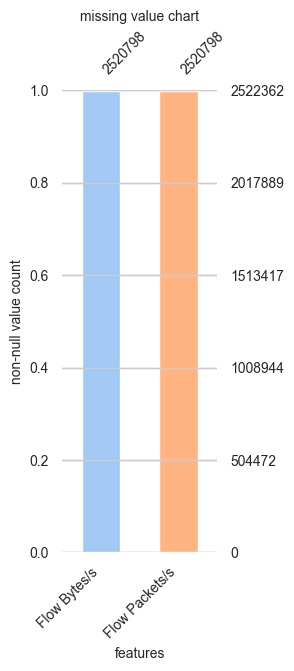

In [40]:
#visualising missing data

sns.set_palette('pastel')
colors = sns.color_palette()

missing_values = [col for col in data.columns if data[col].isna().any()]

fig, ax = plt.subplots(figsize =(2,6))
msno.bar(data[missing_values], ax = ax, fontsize = 10, color = colors)
ax.set_xlabel('features', fontsize = 10)
ax.set_ylabel('non-null value count', fontsize = 10)
ax.set_title('missing value chart', fontsize = 10)
plt.show()

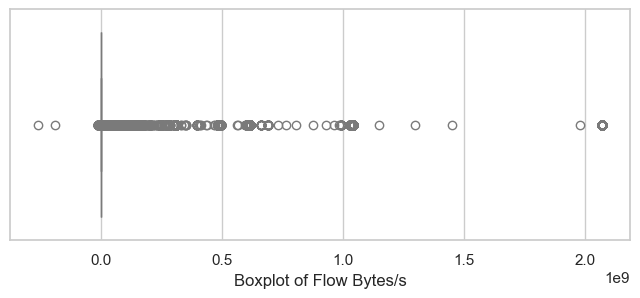

In [42]:
data['Flow Bytes/s'] = pd.to_numeric(data['Flow Bytes/s'], errors='coerce')  # Ensure numeric
data['Flow Bytes/s'] = data['Flow Bytes/s'].replace([np.inf, -np.inf], np.nan)  # Replace inf with NaN
data = data.dropna(subset=['Flow Bytes/s'])  # Drop NaN values

# Plot boxplot
plt.figure(figsize=(8, 3))
sns.boxplot(x=data['Flow Bytes/s'])
plt.xlabel('Boxplot of Flow Bytes/s')
plt.show()

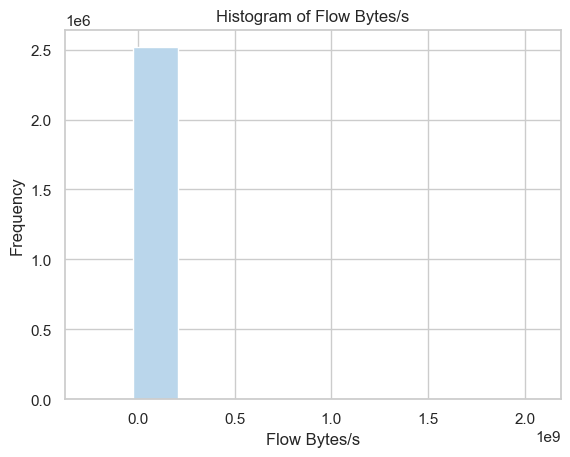

In [46]:
colors = sns.color_palette('Blues')
plt.hist(data['Flow Bytes/s'], color = colors[1])
plt.title('Histogram of Flow Bytes/s')
plt.xlabel('Flow Bytes/s')
plt.ylabel('Frequency')
plt.show()


In [47]:
median_flow_bytes = data['Flow Bytes/s'].median()
median_flow_packets = data['Flow Packets/s'].median()

print('median of flow bytes/s:' , median_flow_bytes)
print('median of flow packets/s:' , median_flow_packets)

median of flow bytes/s: 3715.0378579999997
median of flow packets/s: 69.742244285


In [52]:
# Fixing SettingWithCopyWarning by using .loc[]
data.loc[:, 'Flow Bytes/s'] = data['Flow Bytes/s'].fillna(median_flow_bytes)
data.loc[:, 'Flow Packets/s'] = data['Flow Packets/s'].fillna(median_flow_packets)


In [ ]:
print('no. of \'Flow Bytes/s\' missing values:', data['Flow Bytes/s'].isna().sum())
print('no. of \'Flow Packets/s\' missing values:', data['Flow Packets/s'].isna().sum())

Number of 'Flow Bytes/s' missing values: 0
Number of 'Flow Packets/s' missing values: 0


In [54]:
#analysing the patterns
data['Label'].unique()

array(['BENIGN', 'DDoS', 'PortScan', 'Bot', 'Infiltration',
       'Web Attack � Brute Force', 'Web Attack � XSS',
       'Web Attack � Sql Injection', 'FTP-Patator', 'SSH-Patator',
       'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye',
       'Heartbleed'], dtype=object)

In [55]:
data['Label'].value_counts()

Label
BENIGN                        2095057
DoS Hulk                       172846
DDoS                           128014
PortScan                        90694
DoS GoldenEye                   10286
FTP-Patator                      5931
DoS slowloris                    5385
DoS Slowhttptest                 5228
SSH-Patator                      3219
Bot                              1948
Web Attack � Brute Force         1470
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64

In [61]:
#creating a directory that maps each label to its attack type

attack_map = {
    'BENIGN' : 'BENIGN',
'DoS Hulk' : 'DoS',     
'DDoS' : 'DDoS',                        
'PortScan' : 'Port Scan',                       
'DoS GoldenEye' : 'DoS',                
'FTP-Patator' : 'Brute Force',                    
'DoS slowloris' : 'DoS',                  
'DoS Slowhttptest' : 'DoS',              
'SSH-Patator' : 'Brute Force' ,                    
'Bot' : 'Bot',                              
'Web Attack � Brute Force' : 'Web Attack',        
'Web Attack � XSS' : 'Web Attack',                
'Infiltration' : 'Infiltration',                    
'Web Attack � Sql Injection' : 'Web Attack',        
'Heartbleed' : 'Heartbleed'
}

In [62]:
#creating a new column attack type in teh dataframe.
data.loc[:,'Attack Type'] =  data['Label'].map(attack_map)

In [63]:
data['Attack Type'].value_counts()

Attack Type
BENIGN          2095057
DoS              193745
DDoS             128014
Port Scan         90694
Brute Force        9150
Web Attack         2143
Bot                1948
Infiltration         36
Heartbleed           11
Name: count, dtype: int64

In [68]:
if 'Label' in data.columns:
    data = data.drop(columns=['Label'])

In [76]:
from sklearn.preprocessing import LabelEncoder

# Create a deep copy to avoid modifying a slice
data = data.copy()

# Initialize LabelEncoder
le = LabelEncoder()

# Encode 'Attack Type' safely
data['Attack Number'] = le.fit_transform(data['Attack Type'])

# Verify encoding
print(data['Attack Number'].unique())



[0 3 7 1 6 8 2 4 5]


In [77]:
#printing corresponding type for each encoded value
encoded_values = data['Attack Number'].unique()
for val in sorted(encoded_values):
    print(f"{val}: {le.inverse_transform([val])[0]}")

0: BENIGN
1: Bot
2: Brute Force
3: DDoS
4: DoS
5: Heartbleed
6: Infiltration
7: Port Scan
8: Web Attack


In [83]:
#finding the correlaton between features
correlation = data.corr(numeric_only= True).round(2)
correlation.style.background_gradient(cmap = 'Blues', axis = None).format(precision = 2)

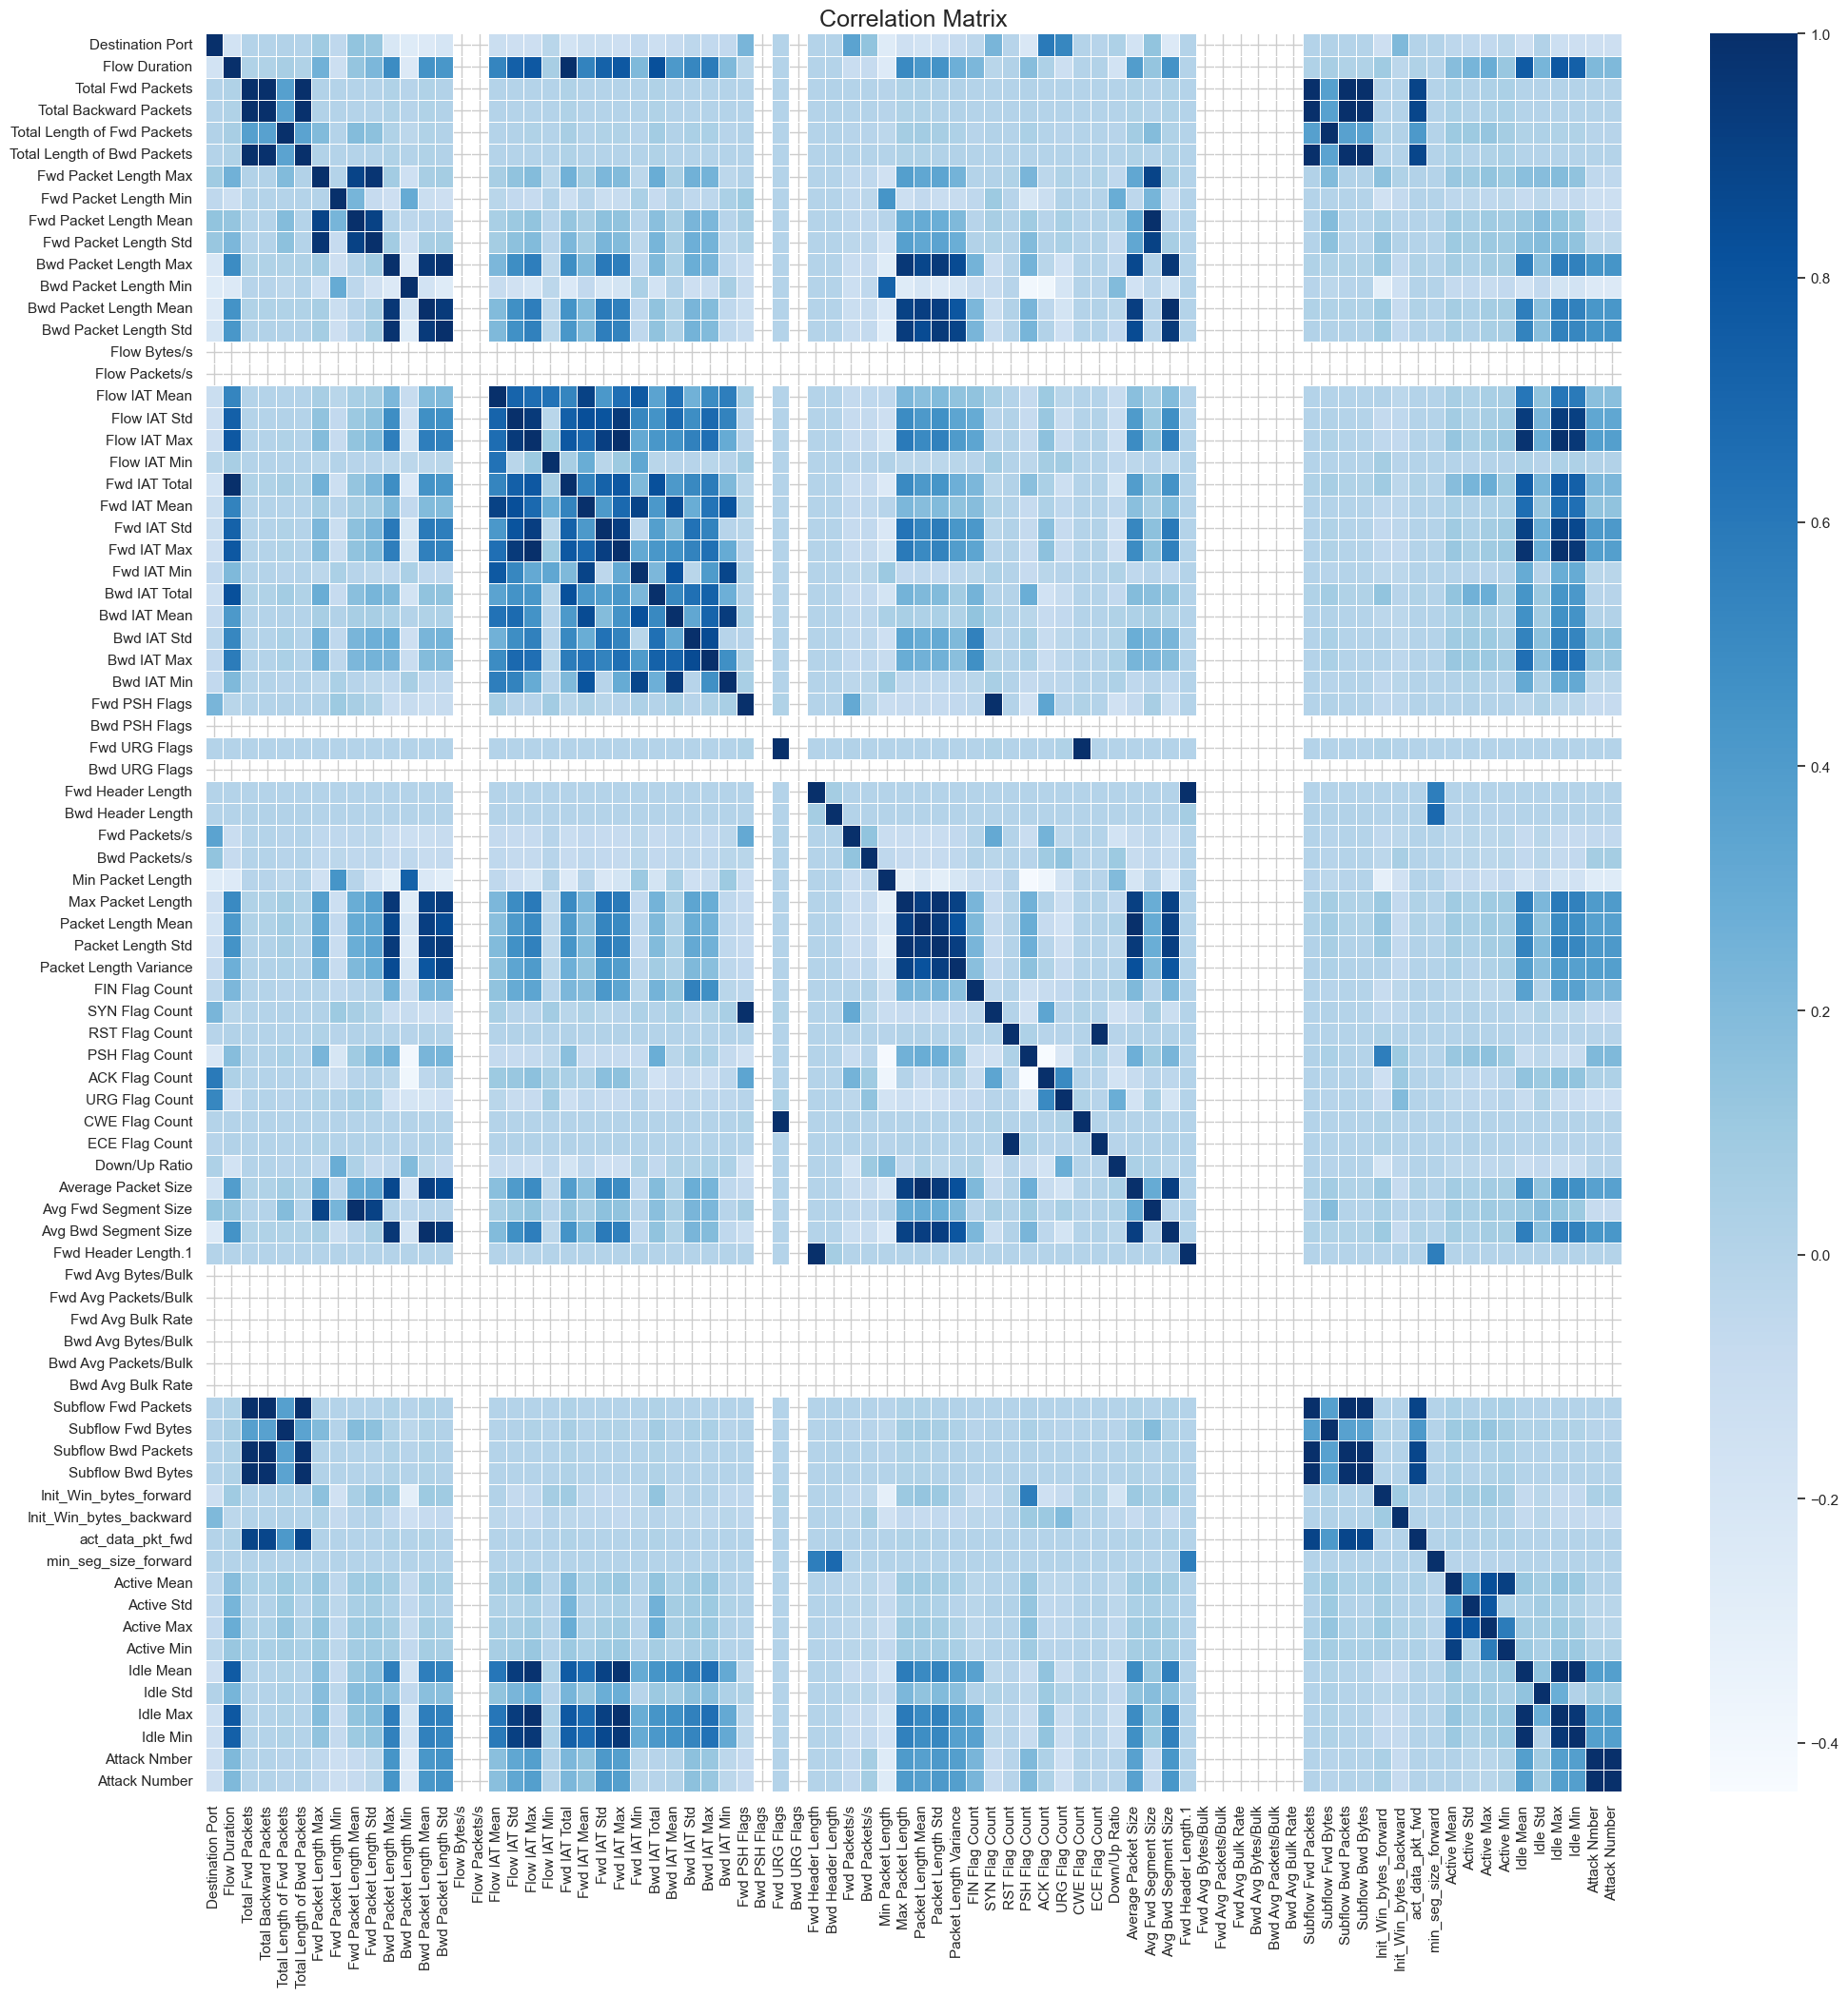

In [86]:
#using a heatmap
fig, ax = plt.subplots(figsize =(24, 24))
sns.heatmap(correlation, cmap= 'Blues', annot = False, linewidth = 0.5)
plt.title('Correlation Matrix', fontsize = 18)
plt.show()

In [93]:
# Positive correlation features for 'Attack Number'
positive_correlation_features = correlation['Attack Number'][(correlation['Attack Number'] > 0) & (correlation['Attack Number'] < 1)].index.tolist()

print("Features with positive correlation with 'Attack Number':\n")
for i, feature in enumerate(positive_correlation_features, start = 1):
    corr_value = correlation.loc[feature, 'Attack Number']
    print('{:<3} {:<24} :{}'.format(f'{i}.', feature, corr_value))

Features with positive correlation with 'Attack Number':

1.  Flow Duration            :0.21
2.  Bwd Packet Length Max    :0.44
3.  Bwd Packet Length Mean   :0.43
4.  Bwd Packet Length Std    :0.45
5.  Flow IAT Mean            :0.17
6.  Flow IAT Std             :0.33
7.  Flow IAT Max             :0.38
8.  Flow IAT Min             :0.01
9.  Fwd IAT Total            :0.22
10. Fwd IAT Mean             :0.15
11. Fwd IAT Std              :0.41
12. Fwd IAT Max              :0.38
13. Bwd IAT Mean             :0.01
14. Bwd IAT Std              :0.16
15. Bwd IAT Max              :0.12
16. Bwd Packets/s            :0.07
17. Max Packet Length        :0.4
18. Packet Length Mean       :0.37
19. Packet Length Std        :0.41
20. Packet Length Variance   :0.38
21. FIN Flag Count           :0.23
22. PSH Flag Count           :0.21
23. ACK Flag Count           :0.03
24. Average Packet Size      :0.36
25. Avg Bwd Segment Size     :0.43
26. Init_Win_bytes_forward   :0.04
27. Active Mean              :0.0

In [94]:
print(f'number of considerable important features: {len(positive_correlation_features)}')

number of considerable important features: 32


In [98]:
#checking for standard deviation (the blank squares in the heat map)
standard_deviation = data.std(numeric_only = True)
zero_standard_deviation_columns = standard_deviation[standard_deviation == 0].index.tolist()
zero_standard_deviation_columns

['Bwd PSH Flags',
 'Bwd URG Flags',
 'Fwd Avg Bytes/Bulk',
 'Fwd Avg Packets/Bulk',
 'Fwd Avg Bulk Rate',
 'Bwd Avg Bytes/Bulk',
 'Bwd Avg Packets/Bulk',
 'Bwd Avg Bulk Rate']

In [99]:
#data sampling
sample_size = int(0.2 * len(data))
sampled_data = data.sample(n = sample_size, replace = False, random_state= 0)
sampled_data.shape

(504159, 81)

In [ ]:
#